In [29]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten

#keras
import keras
from keras.models import Sequential
from keras.preprocessing import image,image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator,load_img

#using incepton v3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [2]:
#As here we are using inceptionV3 we need to resize all images as below.
classLabels = 11
imageSize = [224,224]
batchSize = 15

In [3]:
# load dataset

TrainDataset = "/content/drive/MyDrive/updated_datasets/datasets"
#TestDataset = "/content/drive/MyDrive/datasets/validation_set"

In [4]:
#@title Model Development


In [5]:
#we are using inceptionV3 pre-trained model to train our model. As we need to define output layer based on our classlabels we need to remove it by setting inclide_top to false.
#resnet = ResNet50(input_shape=imageSize + [3],
                   # weights= "imagenet",
                    #include_top = False)

inception = InceptionV3(input_shape=imageSize + [3],
                    weights= "imagenet",
                    include_top = False)                    

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
#for inner layers of inceptionV3 we no need to train them as they are all trained except the output layer whivh we already removed.
for layer in inception.layers:
  layer.trainable = False

In [7]:
x = Flatten()(inception.output)

In [8]:
#we will define the output layer as dense layer having softmax as activation as we are dealing with multi classification
outputLayer = Dense(classLabels, activation='softmax')(x)

In [9]:
 #so our final model is:

model = Model(inputs = inception.input, outputs = outputLayer)

In [10]:
#summary() method provides info of the parameters of dense layer which we need to optimise for training the model. Here we have 512 010 parameters.
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
#@title Compile the model by adding optimiser,loss & metric


In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
#@title Data Augmentation and scaling


In [14]:
trainDataGenerator = ImageDataGenerator(validation_split = 0.2,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'reflect')

In [15]:
# training & validation data generators

trainingData = trainDataGenerator.flow_from_directory(TrainDataset,
                                                 subset = 'training',
                                                 seed = 132,
                                                 target_size= (224,224),
                                                 batch_size = batchSize,
                                                 class_mode= 'categorical')

Found 429 images belonging to 11 classes.


In [16]:
validationData = trainDataGenerator.flow_from_directory(TrainDataset,
                                                 subset = 'validation',
                                                 seed = 132,
                                                 target_size = (224,224),
                                                 batch_size = batchSize,
                                                 class_mode= 'categorical')

Found 107 images belonging to 11 classes.


In [17]:
#@title Fit the model


In [18]:
trainHistory= model.fit_generator(
    trainingData,
    validation_data=validationData,
    epochs=9,
    steps_per_epoch=len(trainingData),
    validation_steps=len(validationData)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/9
11/29 [==========>...................] - ETA: 2:40 - loss: 15.4476 - accuracy: 0.2055

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


29/29 [==============================] - 316s 11s/step - loss: 11.8158 - accuracy: 0.3605 - val_loss: 3.4749 - val_accuracy: 0.6822
Epoch 2/9
29/29 [==============================] - 54s 2s/step - loss: 0.6285 - accuracy: 0.8971 - val_loss: 3.4621 - val_accuracy: 0.7570
Epoch 3/9
29/29 [==============================] - 53s 2s/step - loss: 0.5177 - accuracy: 0.9385 - val_loss: 2.9793 - val_accuracy: 0.7477
Epoch 4/9
29/29 [==============================] - 54s 2s/step - loss: 0.4633 - accuracy: 0.9337 - val_loss: 4.6141 - val_accuracy: 0.7383
Epoch 5/9
29/29 [==============================] - 54s 2s/step - loss: 0.6407 - accuracy: 0.9404 - val_loss: 5.2874 - val_accuracy: 0.6916
Epoch 6/9
29/29 [==============================] - 54s 2s/step - loss: 0.4741 - accuracy: 0.9523 - val_loss: 5.5392 - val_accuracy: 0.6916
Epoch 7/9
29/29 [==============================] - 53s 2s/step - loss: 0.4304 - accuracy: 0.9611 - val_loss: 5.9395 - val_accuracy: 0.7290
Epoch 8/9
29/29 [=================

In [25]:
df = pd.DataFrame(trainHistory.history)




Inception_v3 Model
------------------
Minimum  validation loss: 2.98
Maximum validation accuracy: 0.76


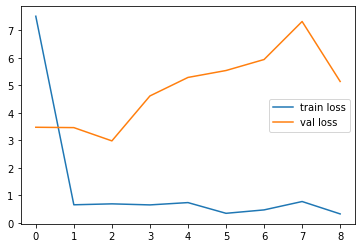

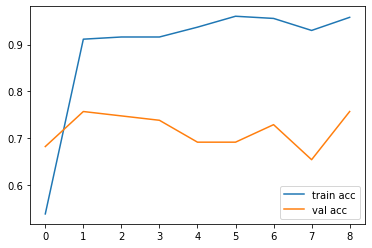

In [26]:

print("Inception_v3 Model")
print("------------------")
print(("Minimum  validation loss: {:0.2f}" +\
      "\nMaximum validation accuracy: {:0.2f}")\
      .format(df['val_loss'].min(), 
              df['val_accuracy'].max()))

# plot the loss
import matplotlib.pyplot as plt
plt.plot(trainHistory.history['loss'], label='train loss')
plt.plot(trainHistory.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(trainHistory.history['accuracy'], label='train acc')
plt.plot(trainHistory.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')



In [21]:
#@title Test other than validation & train data


In [22]:
model.save('Biofuel_inceptionV3_27Apr.h5')

In [27]:


# get the dictionary of classes
label2index = trainingData.class_indices

# obtain the list of classes
list_of_label = list(label2index.keys())
print("The list of classes: ", list_of_label)



The list of classes:  ['Non_Biofuel', 'beetroot', 'coconut', 'corn', 'palm', 'potato', 'rice', 'soybean', 'sugarcane', 'sunflower', 'wood-chip']


In [30]:
img=image.load_img('/content/drive/MyDrive/updated_datasets/testdata/negative/negative-48.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
test_image=preprocess_input(x)

In [31]:
predict = model.predict(test_image)

In [32]:
a=int(np.argmax(predict, axis=1))

In [33]:
a

0

In [34]:
predictedlabel = list_of_label[a]

In [35]:
predictedlabel

'Non_Biofuel'